<h1 align=center> COVID-19 Research Challenge 💉🦠</h1>

| [<img src="https://avatars0.githubusercontent.com/u/18689888" width="150px;" height="150px;"/><br /><sub><b>Amr M. Kayid</b></sub>](https://github.com/AmrMKayid)| [<img src="https://avatars2.githubusercontent.com/u/25725667" width="150px;" height="150px;"/><br /><sub><b>Omar ElSayed</b></sub>](https://github.com/OmarElSayed97/) | [<img src="https://avatars2.githubusercontent.com/u/25728207" width="150px;" height="150px;"/><br /><sub><b>Sama AlShareef</b></sub>](https://github.com/SamaAlshareef) | [<img src="https://avatars1.githubusercontent.com/u/36242784" width="150px;" height="150px;"/><br /><sub><b>Basma Afifi</b></sub>](https://github.com/BasmaAfifi) | [<img src="https://avatars1.githubusercontent.com/u/25587733" width="150px;" height="150px;"/><br /><sub><b>Dahlia Magdi</b></sub>](https://github.com/dahliakarass) | 
| :---: | :---: | :---: | :---: | :---: | 
| amr.kayid@student.guc.edu.eg | omar.elsayedmohamed@student.guc.edu.eg | sama.elsherif@student.guc.edu.eg | basma.afifi@student.guc.edu.eg | dahlia.karass@student.guc.edu.eg |
| **37-15594** | **37-6537** |  **37-0705** |  **37-0620** |  **37-5960** | 
| **T06** | **T07** | **T03** | **T03** | **DMET-T1** | 

<h1 align=center> Overview </h1>

<h2 align=center> The aim of this project is to deeply explore the dataset for COVID-19 Research Challenge, visualize the common words appearning in the papers, to make it easy for others to get quick overview for the topics inside the papers. Moreover, we aimed at creating a better visualization for the papers in the dataset, which make it easy for researcher to explore the papers quickly inside the jupyter notebook without searching on the internet. Lastly, we created a nicely interactive search enginer to search for specific words, papers, challenge's tasks and get the most recent ones with the highest score for the givin keywords. </h2>

# Libraries & Dependencies

We have created a small library called [recovid](https://github.com/amrmkayid/recovid.git) to make it easy for us focusing on analysing and visualizing the dataset without writing all the code snippets in the jupyter notebook.

### The library consist of these submodules:
- **data**: classes for representing single paper and a collection of research papers inside jupyter notebook
- **process**: using nlp techniques for preporcessing and cleaning the input text
- **utils**: some utilities and visualization methods used in the notebook
- **search**: contains classes and methods for building the interactive search engine

PS: To use our custom library, we need to install it first, it automatically install other dependencies and import all needed libraries for this project

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install git+https://github.com/amrmkayid/recovid.git
# !pip uninstall recovid -y

  Cloning https://github.com/amrmkayid/recovid.git to /tmp/pip-req-build-_0udd8fa
  Running command git clone -q https://github.com/amrmkayid/recovid.git /tmp/pip-req-build-_0udd8fa
  Created wheel for recovid: filename=recovid-0.0.1-py3-none-any.whl size=7398 sha256=c8e2041fb8013f9b41d1b4a7ef5cc7c5c5ef567ac3b092d56923da0ce802f1e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-jtldp2o7/wheels/2c/c5/cf/335eeeb73deb2879a122cf4ad7bfa60f1023967ef62070d169
  Created wheel for rank-bm25: filename=rank_bm25-0.2-py3-none-any.whl size=4161 sha256=c8d0b8727823a81e22bbcfe2bd484223631d0727723dfe1d377ade39de6889ac
  Stored in directory: /root/.cache/pip/wheels/82/a9/a2/33d3c389435f63f6fa490ef91417c997ccc4e7db75f5a7b2f8
Successfully built recovid rank-bm25


In [3]:
#@title Libraries & Dependencies

from recovid import *
import recovid.data as data
import recovid.process as process
import recovid.search as search
import recovid.utils as utils

# Configs

In [4]:
#@title Configuration

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (25, 10)
warnings.filterwarnings("ignore")

nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')

ROOT_PATH = Path("/kaggle/input/CORD-19-research-challenge/")
METADATA_PATH = ROOT_PATH / "metadata.csv"
ROOT_PATH, METADATA_PATH

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(PosixPath('/kaggle/input/CORD-19-research-challenge'),
 PosixPath('/kaggle/input/CORD-19-research-challenge/metadata.csv'))

## Loading metadata
> We are going to explore the metadata, clean the dataframe, check how to extract useful information, and do some basic visualizations

In [5]:
metadata = pd.read_csv(
    METADATA_PATH,
    dtype={
        "doi": str,
        "title": str,
        "pubmed_id": str,
        "Microsoft Academic Paper ID": str,
    },
)
metadata.head(3)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,unk,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704,unk,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...


In [6]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57366 entries, 0 to 57365
Data columns (total 18 columns):
cord_uid                       57366 non-null object
sha                            43540 non-null object
source_x                       57366 non-null object
title                          57203 non-null object
doi                            54020 non-null object
pmcid                          46804 non-null object
pubmed_id                      40905 non-null object
license                        57366 non-null object
abstract                       46847 non-null object
publish_time                   57358 non-null object
authors                        54840 non-null object
journal                        51576 non-null object
Microsoft Academic Paper ID    964 non-null object
WHO #Covidence                 1768 non-null object
has_pdf_parse                  57366 non-null bool
has_pmc_xml_parse              57366 non-null bool
full_text_file                 48921 non-null obje

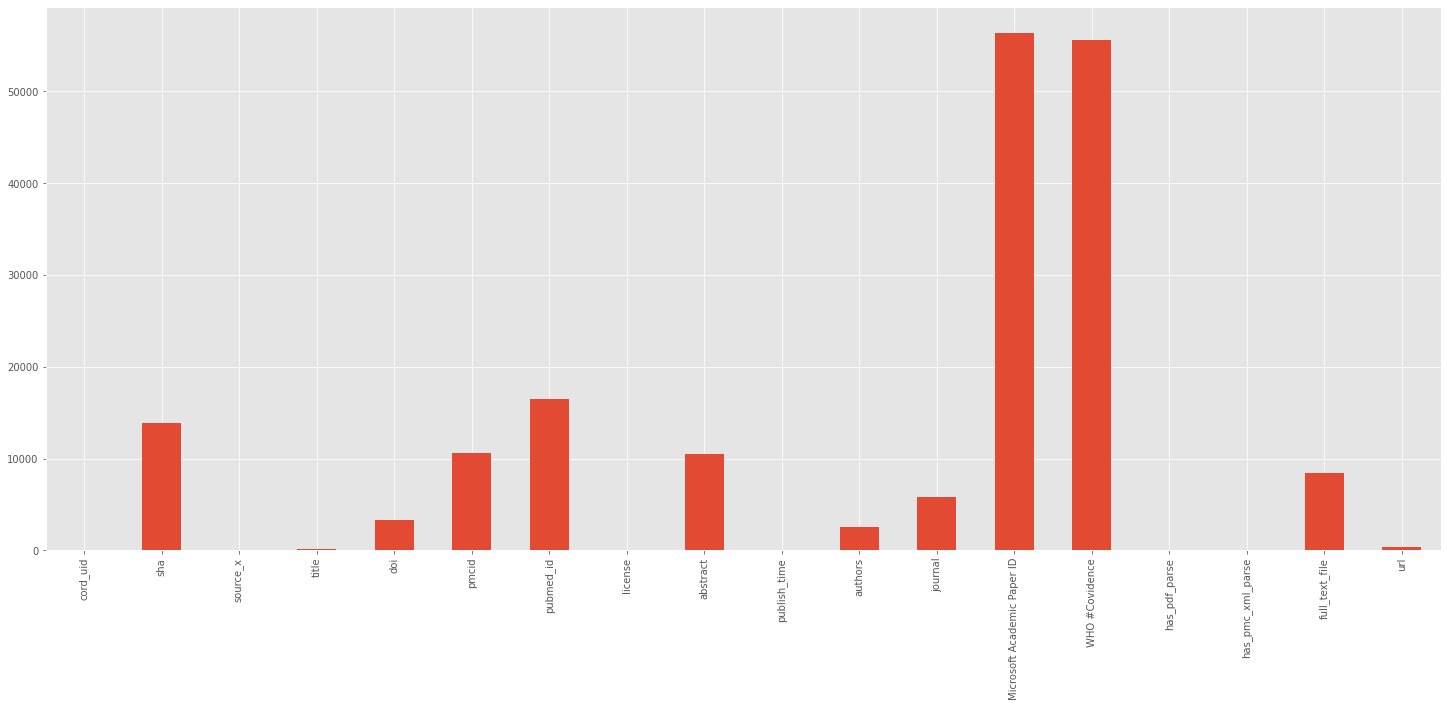

In [7]:
# Visualizing null values in each column
metadata.isna().sum().plot(kind="bar", stacked=True)

In [8]:
metadata.isna().sum()

cord_uid                           0
sha                            13826
source_x                           0
title                            163
doi                             3346
pmcid                          10562
pubmed_id                      16461
license                            0
abstract                       10519
publish_time                       8
authors                         2526
journal                         5790
Microsoft Academic Paper ID    56402
WHO #Covidence                 55598
has_pdf_parse                      0
has_pmc_xml_parse                  0
full_text_file                  8445
url                              306
dtype: int64

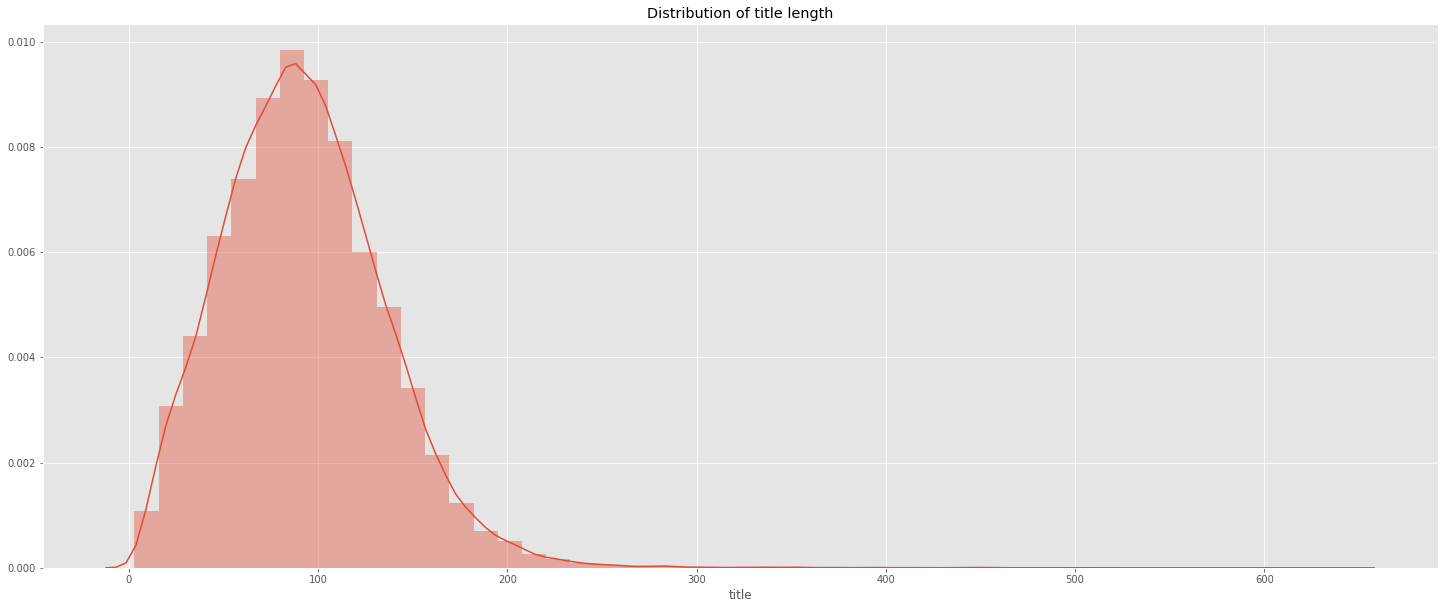

In [9]:
# Distribution of title length

sns.distplot(metadata["title"].str.len())
plt.title("Distribution of title length")
plt.show()

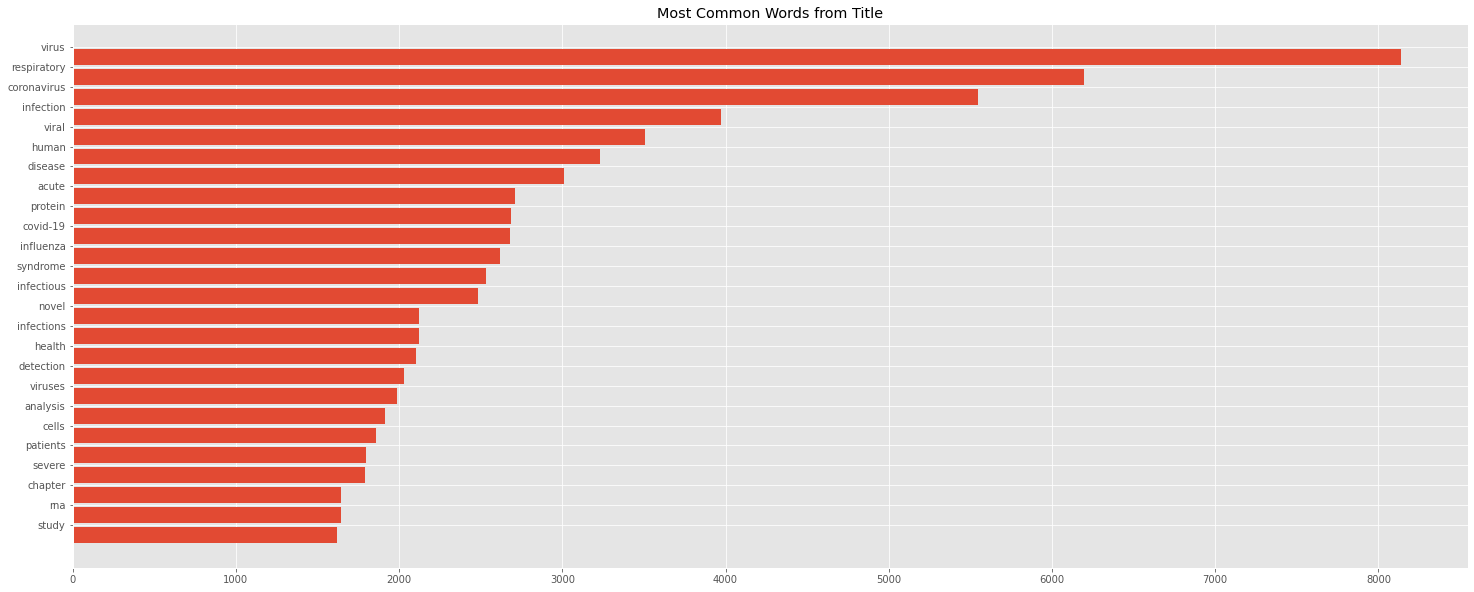

In [10]:
#@title Visualizing Most Common Words from Title

utils.most_common_words_from_title(metadata)

In [11]:
#@title Visualizing Most Common Journals

utils.most_common_journals(metadata)

In [12]:
# Set the abstract to the paper title if it is null

metadata.abstract = metadata.abstract.fillna(metadata.title)
print("Number of articles before removing duplicates: %s " % len(metadata))

duplicate_paper = ~(metadata.title.isnull() | metadata.abstract.isnull() | metadata.publish_time.isnull()) & (metadata.duplicated(subset=['title', 'abstract']))
metadata.dropna(subset=['publish_time', 'journal'])
metadata = metadata[~duplicate_paper].reset_index(drop=True)
print("Number of articles AFTER removing duplicates: %s " % len(metadata))

Number of articles before removing duplicates: 57366 
Number of articles AFTER removing duplicates: 56805 


## Creating an interactive class for research paper presentation

In [13]:
papers = data.ResearchPapers(metadata)

In [14]:
paper = papers[0]
print(f'Example paper \n\nTitle: {paper.title()} \n\nAuthors: {paper.authors(split=True)} \n\nAbstract: {paper.abstract()} \n\n')

Example paper 

Title: Sequence requirements for RNA strand transfer during nidovirus discontinuous subgenomic RNA synthesis 

Authors: ['Pasternak, Alexander O.', 'van den Born, Erwin', 'Spaan, Willy J.M.', 'Snijder, Eric J.'] 

Abstract: Nidovirus subgenomic mRNAs contain a leader sequence derived from the 5′ end of the genome fused to different sequences (‘bodies’) derived from the 3′ end. Their generation involves a unique mechanism of discontinuous subgenomic RNA synthesis that resembles copy-choice RNA recombination. During this process, the nascent RNA strand is transferred from one site in the template to another, during either plus or minus strand synthesis, to yield subgenomic RNA molecules. Central to this process are transcription-regulating sequences (TRSs), which are present at both template sites and ensure the fidelity of strand transfer. Here we present results of a comprehensive co-variation mutagenesis study of equine arteritis virus TRSs, demonstrating that disconti

In [15]:
# Summary for a single paper
paper

,Value
cord_uid,zjufx4fo
sha,b2897e1277f56641193a6db73825f707eed3e4c9
source_x,PMC
title,Sequence requirements for RNA strand transfer ...
doi,10.1093/emboj/20.24.7220
pmcid,PMC125340
pubmed_id,11742998
license,unk
abstract,Nidovirus subgenomic mRNAs contain a leader se...
publish_time,2001-12-17


## Rendering the whole paper as HTML page inside jupyter notebook

In [16]:
paper.html()

HTML(value='<!DOCTYPE html>\n<html lang="en" class="pb-page"  data-request-id="0c23eff0-762f-4a80-9c48-2be9922…

In [17]:
display(HTML(paper.text()))

Mutant,Genomic RNA synthesis (% of wild type)
L4,111 ± 12
B4,72 ± 14
LB4,89 ± 2


# Creating interactive Search Engine

In [18]:
search_engine = search.SearchEngine(metadata)
search_engine

In [19]:
keywords = 'virus pandemic' #@param {type:"string"}
results = search_engine.search(keywords, 50)
results.results.sort_values(by=['publish_time'], ascending=False).head(5)

,title,abstract,doi,authors,journal,publish_time,Score
23,First report of two consecutive respiratory sy...,Abstract Objective Respiratory syncytial virus...,10.1016/j.jpedp.2018.10.008,"Silva, Daniella Gregoria Bomfim Prado da; Alme...",Jornal de Pediatria (Versão em Português),2020-04-30,78.135472
42,Aetiology of Canine Infectious Respiratory Dis...,Summary The canine infectious respiratory dise...,10.1016/j.jcpa.2020.02.005,"Day, M.J.; Carey, S.; Clercx, C.; Kohn, B.; Ma...",Journal of Comparative Pathology,2020-04-30,78.101967
2,Influencia de la infección SARS-Cov2 sobre Enf...,RESUMEN INTRODUCCIÓN: La infección por el coro...,10.1016/j.nrl.2020.04.002,"Serrano-Castro, Pedro J.; Estivill-Torrús, Gui...",Neurología,2020-04-17,78.262946
22,COVID-19 y enfermedad cardiovascular,Resumen En diciembre de 2019 en Wuhan en la pr...,10.1016/j.rccar.2020.04.004,"Triana, Juan Francisco Figueroa; Márquez, Dieg...",Revista Colombiana de Cardiología,2020-04-17,78.137008
1,Recomendaciones de consenso respecto al soport...,Resumen La enfermedad por coronavirus 2019 (CO...,10.1016/j.redar.2020.03.006,"Cinesi Gómez, C.; Peñuelas Rodríguez, Ó.; Lujá...",Revista Española de Anestesiología y Reanimación,2020-04-16,78.266221


# Creating an Autocomplete Search bar with ranking by score

In [20]:
search_terms = 'virus pandemic' #@param {type:"string"}
searchbar = widgets.interactive(lambda search_terms: search.search_papers(search_engine, search_terms), search_terms=search_terms)
searchbar

,title,abstract,doi,authors,journal,publish_time,Score
172,The Chinese herbal prescription JZ-1 induces a...,Abstract Ethnophamacological relevance The Chi...,10.1016/j.jep.2020.112611,"Shao, Qingqing; Liu, Tong; Wang, Wenjia; Duan,...",Journal of Ethnopharmacology,2020-05-23,78.030328
42,Aetiology of Canine Infectious Respiratory Dis...,Summary The canine infectious respiratory dise...,10.1016/j.jcpa.2020.02.005,"Day, M.J.; Carey, S.; Clercx, C.; Kohn, B.; Ma...",Journal of Comparative Pathology,2020-04-30,78.101967
23,First report of two consecutive respiratory sy...,Abstract Objective Respiratory syncytial virus...,10.1016/j.jpedp.2018.10.008,"Silva, Daniella Gregoria Bomfim Prado da; Alme...",Jornal de Pediatria (Versão em Português),2020-04-30,78.135472
77,Prioritisation of potential anti-SARS-CoV-2 dr...,Many papers are emerging that describe the in ...,10.1101/2020.04.16.20068379,Usman Arshad; Henry Pertinez; Helen Box; Lee T...,NaN,2020-04-22,78.073585
22,COVID-19 y enfermedad cardiovascular,Resumen En diciembre de 2019 en Wuhan en la pr...,10.1016/j.rccar.2020.04.004,"Triana, Juan Francisco Figueroa; Márquez, Dieg...",Revista Colombiana de Cardiología,2020-04-17,78.137008
2,Influencia de la infección SARS-Cov2 sobre Enf...,RESUMEN INTRODUCCIÓN: La infección por el coro...,10.1016/j.nrl.2020.04.002,"Serrano-Castro, Pedro J.; Estivill-Torrús, Gui...",Neurología,2020-04-17,78.262946
1,Recomendaciones de consenso respecto al soport...,Resumen La enfermedad por coronavirus 2019 (CO...,10.1016/j.redar.2020.03.006,"Cinesi Gómez, C.; Peñuelas Rodríguez, Ó.; Lujá...",Revista Española de Anestesiología y Reanimación,2020-04-16,78.266221
110,Développement professionnel continu (DPC) et é...,Résumé La formation médicale continue (FMC) es...,10.1016/j.banm.2020.04.006,"Bertrand, D.; Bouet, P.",Bulletin de l'Académie Nationale de Médecine,2020-04-15,78.054224
60,Dos terapias conocidas podrían ser efectivas c...,"Resumen La neumonía causada por coronavirus, q...",10.1016/j.redar.2020.03.004,"Hernández, A.; Papadakos, P.J.; Torres, A.; Go...",Revista Española de Anestesiología y Reanimación,2020-04-14,78.083653
190,SARS-CoV-2 infection in Health Care Workers in...,Background On January 31st the first case of C...,10.1101/2020.04.07.20055723,Maria Dolores Folgueira; Carmen Munoz-Ruiperez...,NaN,2020-04-11,78.021384


# COVID Research Tasks 

In [21]:
tasks = [
    ('What is known about transmission, incubation, and environmental stability?',
     'transmission incubation environment coronavirus'),
    ('What do we know about COVID-19 risk factors?', 'risk factors'),
    ('What do we know about virus genetics, origin, and evolution?',
     'genetics origin evolution'),
    ('What has been published about ethical and social science considerations',
     'ethics ethical social'),
    ('What do we know about diagnostics and surveillance?',
     'diagnose diagnostic surveillance'),
    ('What has been published about medical care?', 'medical care'),
    ('What do we know about vaccines and therapeutics?',
     'vaccines vaccine vaccinate therapeutic therapeutics')
]
tasks = pd.DataFrame(tasks, columns=['Task', 'Keywords'])

# Kaggle/Colab widget searching

In [22]:
results = interact(lambda task: search.show_task(search_engine, tasks, task), task=tasks.Task.tolist());

What is known about transmission, incubation, and environmental stability?


,title,abstract,doi,authors,journal,publish_time,Score
0,Influence of different glycoproteins and of th...,ABSTRACTHost plasma membrane protein SERINC5 i...,10.1101/780577,William E. Diehl; Mehmet H. Guney; Pyae Phyo K...,NaN,2019-09-24,263.910398
1,Revisión sobre las infecciones no bacterianas ...,Resumen Aunque las bacterias son los principal...,10.1016/j.arbres.2015.02.015,"Galván, José María; Rajas, Olga; Aspa, Javier",Archivos de Bronconeumología,2015-11-30,263.898015
2,The 12th Edition of the Scientific Days of the...,A1 The outcome of patients with recurrent vers...,10.1186/s12879-016-1877-4,"Niculae, Cristian-Mihail; Manea, Eliza; Jipa, ...",BMC Infect Dis,2016-11-01,263.864935
3,Chinese Practice in Public International Law: ...,This Survey covers materials reflecting Chines...,10.1093/chinesejil/jmt020,"ZHU, Lijiang; MA, Chengyuan",NaN,2013-07-20,263.835973
4,Versuche zur Entwicklung einer Immunprophylaxe...,ZUSAMMENFASSUNG: Mit dem über 300 Passagen in ...,10.1111/j.1439-0450.1978.tb01684.x,"Hess, R. G.; Bachmann, P. A.; Mayr, A.",J Vet Med B Infect Dis Vet Public Health,2010-05-13,263.827779
...,...,...,...,...,...,...,...
195,The Fecal Virome of Pigs on a High-Density Farm,Swine are an important source of proteins worl...,10.1128/jvi.05217-11,"Shan, Tongling; Li, Linlin; Simmonds, Peter; W...",Journal of Virology,2011-09-07,263.205758
196,Epitope Addition and Ablation via Manipulation...,"Despite the clinical relevance, dengue virus (...",10.1128/msphere.00380-16,"Gallichotte, Emily N.; Menachery, Vineet D.; Y...",mSphere,2017-02-22,263.205733
197,Assembly and budding of influenza virus,Abstract Influenza viruses are causative agent...,10.1016/j.virusres.2004.08.012,"Nayak, Debi P.; Hui, Eric Ka-Wai; Barman, Subrata",Virus Research,2004-12-31,263.204345
198,Pressure‐controlled versus volume‐controlled v...,BACKGROUND: Acute lung injury (ALI) and acute ...,10.1002/14651858.cd008807.pub2,"Chacko, Binila; Peter, John V; Tharyan, Pratha...",Cochrane Database of Systematic Reviews,2015-01-14,263.203603
